In [234]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from algorithms.Base_Model import BaseModel

In [235]:
class LinearRegressionClass(BaseModel):

    def __init__(self):
        super(LinearRegressionClass, self).__init__()

    def create(self, train, test, categorical_features=[], drop_columns=[], name='', isScope=True, sample_weights=None, evaluation=False):
        super().create(train=train, test=test, categorical_features=categorical_features, drop_columns=drop_columns,
                       name=name, isScope=isScope, sample_weights=sample_weights, evaluation=evaluation)

        self.model = LinearRegression()
        return self


    def fit(self,):
        self.model.fit(self.X_train_tmp, self.y_train_tmp)

    def predict(self,):
        self.X_test_tmp['log_prediction_' + self.name] = self.model.predict(self.X_test_tmp.drop(['target','sku'] + self.drop_columns, axis=1))
        self.X_test_tmp['prediction_' + self.name] = np.expm1(self.X_test_tmp['log_prediction_' + self.name])

        return self.X_test_tmp[['Date', 'sku', 'target', 'real_target', 'log_prediction_' + self.name, 'prediction_' + self.name]]

    def plot_feature_importance(self):
        print(self.model.coef_)

    def run(self):
        self.X_train = self.X_train.fillna(0)
        self.X_test = self.X_test.fillna(0)
        predictions = pd.DataFrame()
        if self.evaluation:
            print('No Evaluation for Linear Regression')
        else:
            for s in set(self.X_test.sku):
                mask_train = self.X_train.sku == s
                mask_test = self.X_test.sku == s
                self.X_train_tmp = self.X_train[mask_train].drop('sku', axis=1).copy()
                self.y_train_tmp = self.y_train.loc[self.X_train_tmp.index]
                self.X_test_tmp = self.X_test[mask_test].copy()
                self.fit()
                predictions = pd.concat([predictions, self.predict()])
        return predictions

    def get_model(self):
        return self.model


In [236]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from algorithms.Model_Generator import Generator

import sys
#sys.path.append('.')

from preprocessing.preprocessing import preprocessing, convert_date
from metrics.MAPE import MAPE

from utils import add_all_features

train = pd.read_csv("../dataset/original/train.csv")
test = pd.read_csv("../dataset/original/x_test.csv")

In [73]:
useTest = False
useScope = False
isEvaluation = False
useSampleWeights, weights_type = True, 2
save = False
completeCV = True
dataAugm = True

if isEvaluation:
    useTest = False
    useScope = False

if completeCV:
    useTest = False
    useScope = False

df = preprocessing(train, test, useTest=useTest, dataAugmentation=dataAugm)

df, categorical_f = add_all_features(df)
categorical_f = ['sku', 'pack', 'brand'] + categorical_f

df = df.sort_values('Date')


0it [00:00, ?it/s]
517it [00:00, 5167.69it/s]
1027it [00:00, 5146.77it/s]
1418it [00:00, 4700.52it/s]
1864it [00:00, 4621.76it/s]
2208it [00:00, 4100.16it/s]
2546it [00:00, 3576.92it/s]
2866it [00:00, 2574.85it/s]
3137it [00:01, 2126.46it/s]
3372it [00:01, 1994.78it/s]
3589it [00:01, 1992.89it/s]
3849it [00:01, 2142.13it/s]
4120it [00:01, 2285.79it/s]
4584it [00:01, 2696.04it/s]
5083it [00:01, 3126.57it/s]
5448it [00:01, 2622.63it/s]
5892it [00:01, 2989.30it/s]
6429it [00:02, 3447.84it/s]
6921it [00:02, 3787.80it/s]
7354it [00:02, 3512.22it/s]
8083it [00:02, 3272.25it/s]

0it [00:00, ?it/s]
3010it [00:00, 30097.01it/s]
5079it [00:00, 26483.72it/s]
8083it [00:00, 22608.53it/s]

100%|██████████| 43/43 [00:00<00:00, 323.76it/s]


In [34]:
#   --------------- Model -----------------

drop_cols = ['scope', 'Date', 'real_target', 'pack', 'size (GM)', 'cluster', 'brand', 'pack']
categorical_f = [x for x in categorical_f if x not in drop_cols]

#CLUSTER = [1,2,3]      # Set CLUSTER = None if you want NOT to consider any cluster
CLUSTER = None
NAME = 'linear_reg'

model = LinearRegressionClass()
model_gen = Generator(df, model,
                        categorical_features=categorical_f,
                        drop_columns=drop_cols,
                        isScope=useScope,
                        sample_weights_type=weights_type,
                        evaluation=isEvaluation,
                        useTest=useTest,
                        cluster=CLUSTER,
                        name=NAME,
                        completeCV=completeCV,
                        dataAugmentation=dataAugm,
                        )

prediction = model_gen.run_generator(False)

#print(model_gen.compute_MAPE())
#model_gen.plot_feature_importance()

38it [00:22,  1.55it/s]

KeyboardInterrupt: 

In [21]:
from metrics.MAPE import MAPE

In [22]:
prediction

,Date,sku,target,real_target,log_prediction_linear_reg,prediction_linear_reg
291,2019-06-29,546,11.025295,61407.0,11.033771,61929.675426
1081,2019-06-29,1027,10.819638,49992.0,10.816172,49819.011489
1555,2019-06-29,1058,10.364450,31711.0,10.370710,31910.123778
449,2019-06-29,549,10.427565,33777.0,10.427925,33789.150922
1713,2019-06-29,1065,11.352592,85185.0,11.372440,86892.587226
...,...,...,...,...,...,...
789,2019-12-14,686,0.000000,0.0,10.243523,28098.957523
157,2019-12-14,144,0.000000,0.0,10.141482,25373.055402
947,2019-12-14,688,0.000000,0.0,10.455362,34729.095999
1895,2019-12-14,1206,0.000000,0.0,10.732122,45802.790287


In [23]:
mapes = {}
for d in prediction.Date.drop_duplicates():
    mask = prediction.Date == d
    mapes[d] = MAPE(prediction[mask].real_target, prediction[mask].prediction_linear_reg)
mapes

../metrics/MAPE.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


{Timestamp('2019-06-29 00:00:00'): 7.383171283949492,
 Timestamp('2019-07-06 00:00:00'): 8.450730468844043,
 Timestamp('2019-07-13 00:00:00'): 14.107563330140696,
 Timestamp('2019-07-20 00:00:00'): 14.0129925449229,
 Timestamp('2019-07-27 00:00:00'): 9.898390985895936,
 Timestamp('2019-08-03 00:00:00'): 7.6212595722054175,
 Timestamp('2019-08-10 00:00:00'): 4.917997058802329,
 Timestamp('2019-08-17 00:00:00'): 4.342349340793494,
 Timestamp('2019-08-24 00:00:00'): 4.799367767324951,
 Timestamp('2019-08-31 00:00:00'): 3.4310752620941805,
 Timestamp('2019-09-07 00:00:00'): 2.27102973108181,
 Timestamp('2019-09-14 00:00:00'): 10.25212706217548,
 Timestamp('2019-09-21 00:00:00'): 9.81459928961694,
 Timestamp('2019-09-28 00:00:00'): 8.578740619935477,
 Timestamp('2019-10-05 00:00:00'): 7.829151483646224,
 Timestamp('2019-10-12 00:00:00'): 6.2859965532339706,
 Timestamp('2019-10-19 00:00:00'): 5.292601820388876,
 Timestamp('2019-10-26 00:00:00'): 8.406469419123164,
 Timestamp('2019-11-02 00:0

In [21]:
#mask = (prediction.Date=='2017-01-07')
#prediction = prediction.drop(prediction[mask].index)

In [32]:
MAPE(prediction[prediction.Date != '2019-12-14'].real_target, round(prediction[prediction.Date != '2019-12-14'].prediction_linear_reg))

7.094275374070776

In [9]:
model_gen.plot_feature_importance()

TypeError: plot_feature_importance() takes 1 positional argument but 2 were given

In [110]:
s = 546
mask = (prediction.Date >= '2016-12-31') & (prediction.Date <= '2017-01-07') & (prediction.sku == s)
prediction[mask]['target']

Series([], Name: target, dtype: float64)

In [15]:
mapes = {}
for d in prediction.Date.drop_duplicates():
    mask = prediction.Date == d
    mapes[d] = MAPE(prediction[mask].real_target, prediction[mask].prediction_linear_reg)
mapes

NameError: name 'prediction' is not defined

In [7]:
dummy = pd.get_dummies(df.sku, prefix='sku')
dummy

,sku_144,sku_546,sku_549,sku_554,sku_686,sku_688,sku_1027,sku_1035,sku_1051,sku_1058,...,sku_2683,sku_2689,sku_2696,sku_2698,sku_2704,sku_2705,sku_2707,sku_2711,sku_2712,sku_2718
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
df.columns

Index(['Date', 'sku', 'pack', 'size (GM)', 'brand', 'price', 'POS_exposed w-1',
       'volume_on_promo w-1', 'sales w-1', 'scope', 'target', 'real_target'],
      dtype='object')

# Linear Regression per Cluster

In [8]:
class LinearRegressionClass(BaseModel):

    def __init__(self):
        super(LinearRegressionClass, self).__init__()

    def create(self, train, test, categorical_features=[], drop_columns=[], name='', isScope=True, sample_weights=None, evaluation=False):
        super().create(train=train, test=test, categorical_features=categorical_features, drop_columns=drop_columns,
                       name=name, isScope=isScope, sample_weights=sample_weights, evaluation=evaluation)

        self.model = LinearRegression()
        return self


    def fit(self,):
        self.model.fit(self.X_train_tmp, self.y_train_tmp)

    def predict(self,):
        self.X_test_tmp['log_prediction_' + self.name] = self.model.predict(self.X_test_tmp.drop(['target','cluster','sku'] + self.drop_columns, axis=1))
        self.X_test_tmp['prediction_' + self.name] = np.expm1(self.X_test_tmp['log_prediction_' + self.name])

        return self.X_test_tmp[['Date', 'sku', 'target', 'real_target', 'log_prediction_' + self.name, 'prediction_' + self.name]]

    def plot_feature_importance(self):
        print(self.model.coef_)

    def run(self):
        self.X_train = self.X_train.fillna(0)
        self.X_test = self.X_test.fillna(0)
        predictions = pd.DataFrame()
        if self.evaluation:
            print('No Evaluation for Linear Regression')
        else:
            for s in set(self.X_test.cluster):
                mask_train = self.X_train.cluster == s
                mask_test = self.X_test.cluster == s
                self.X_train_tmp = self.X_train[mask_train].drop(['cluster', 'sku'], axis=1).copy()
                self.y_train_tmp = self.y_train.loc[self.X_train_tmp.index]
                self.X_test_tmp = self.X_test[mask_test].copy()
                self.fit()
                predictions = pd.concat([predictions, self.predict()])
        return predictions

    def get_model(self):
        return self.model


In [9]:
#   --------------- Model -----------------

drop_cols = ['scope', 'Date', 'real_target', 'pack', 'size (GM)']
categorical_f = [x for x in categorical_f if x not in drop_cols]

#CLUSTER = [1,2,3]      # Set CLUSTER = None if you want NOT to consider any cluster
CLUSTER = None
NAME = 'linear_reg'

model = LinearRegressionClass()
model_gen = Generator(df, model,
                        categorical_features=categorical_f,
                        drop_columns=drop_cols,
                        isScope=useScope,
                        sample_weights_type=weights_type,
                        evaluation=isEvaluation,
                        useTest=useTest,
                        cluster=CLUSTER,
                        name=NAME,
                        completeCV=completeCV,
                        dataAugmentation=dataAugm,
                        )

prediction = model_gen.run_generator(False)

#print(model_gen.compute_MAPE())
#model_gen.plot_feature_importance()

25it [00:00, 30.09it/s]


In [13]:
prediction

,Date,sku,target,real_target,log_prediction_linear_reg,prediction_linear_reg
133,2019-06-29,144,9.694555,16228.0,9.949648,20943.851733
765,2019-06-29,686,9.960718,21177.0,10.209651,27163.097516
1397,2019-06-29,1051,9.349145,11488.0,9.454814,12768.493476
291,2019-06-29,546,11.025295,61407.0,11.094505,65807.517400
449,2019-06-29,549,10.427565,33777.0,10.468707,35195.666007
...,...,...,...,...,...,...
1105,2019-12-14,1027,0.000000,0.0,10.873714,52769.860201
1263,2019-12-14,1035,0.000000,0.0,10.594455,39911.910376
1579,2019-12-14,1058,0.000000,0.0,10.231490,27762.853447
1737,2019-12-14,1065,0.000000,0.0,11.388736,88320.210582


In [23]:
MAPE(prediction[prediction.target != 0.0].real_target, prediction[prediction.target != 0.0].prediction_linear_reg)

7.739498205463469

In [21]:
prediction[prediction.target != 0.0].real_target

133     16228.0
765     21177.0
1397    11488.0
291     61407.0
449     33777.0
         ...   
1104    47611.0
1262    38087.0
1578    27794.0
1736    79456.0
1894    37889.0
Name: real_target, Length: 288, dtype: float64

In [8]:
preds = pd.read_csv("../dataset/prediction/val/linear_reg_val.csv")
preds.Date = pd.to_datetime(preds.Date)

In [9]:
df = df.merge(preds[['Date', 'sku', 'log_prediction_linear_reg']], how='left', on=['Date', 'sku'])

In [40]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

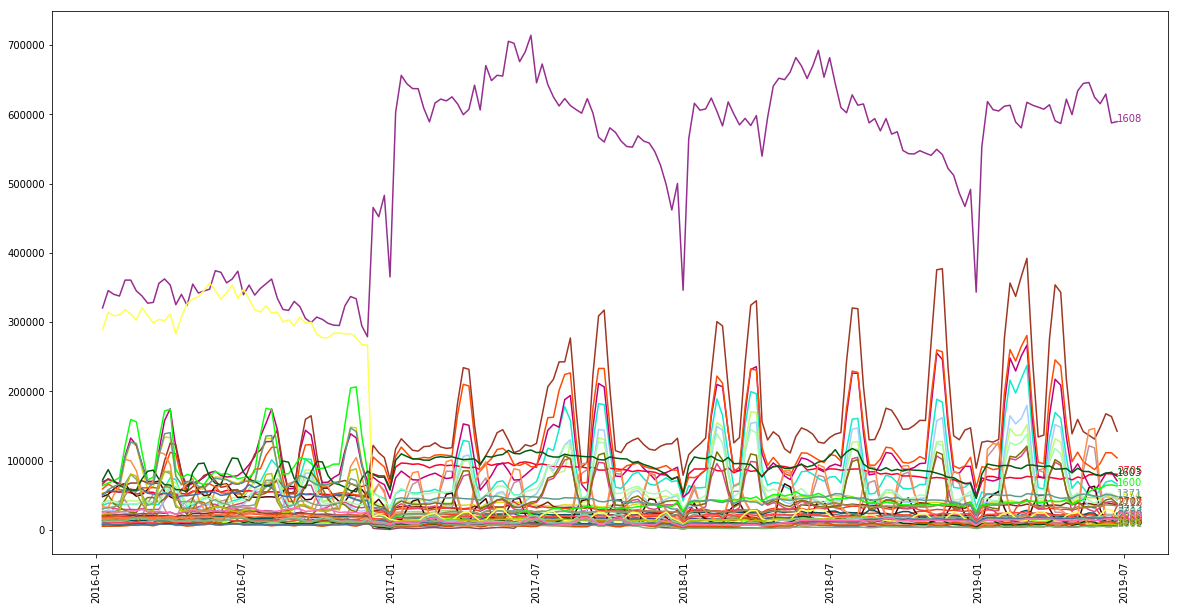

In [41]:
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
for i, s in enumerate(set(train.sku)):
    plt.plot(df[df.sku==s].Date, df[df.sku==s].real_target,  color=mycolors[i])
    last_x, last_y = df[df.sku==s].Date.values[-1], df[df.sku==s].real_target.values[-1]
    plt.text(last_x, last_y, str(s), color=mycolors[i])

In [237]:
df = convert_date(train)

In [238]:
df17 = df[df.Date.dt.year == 2017].sort_values(['sku', 'Date']).reset_index(drop=True)
df18 = df[df.Date.dt.year == 2018].sort_values(['sku', 'Date']).reset_index(drop=True)

In [239]:
df16 = df17.merge(df18, how='left', on=['sku', 'pack', 'size (GM)', 'brand', 'scope'], left_index=True, right_index=True)
df16 = df16.sort_values(['sku', 'Date_x'])

In [240]:
cols = ['price', 'POS_exposed w-1', 'volume_on_promo w-1', 'sales w-1', 'target']
for c in cols:
    df16[c] = (df16[c + '_x'].values + df16[c + '_y'].values) / 2

In [241]:
drop_cols = [c for c in df16.columns if '_x' in c or '_y' in c]
df16 = df16.drop(drop_cols, axis=1)

In [242]:
res = []
for d in df[df.Date.dt.year == 2016].Date.drop_duplicates().values:
    res.append(d)

In [243]:
res

[numpy.datetime64('2016-12-10T00:00:00.000000000'),
 numpy.datetime64('2016-12-17T00:00:00.000000000'),
 numpy.datetime64('2016-12-24T00:00:00.000000000'),
 numpy.datetime64('2016-12-31T00:00:00.000000000')]

In [244]:
start_date = pd.to_datetime('2016-12-10')
while len(res) != 52:
    date = start_date - pd.to_timedelta(7, unit='d')
    res.append(date)
    start_date = date

In [245]:
res = pd.to_datetime(res)
res = res.sort_values()
res = [res] * 43
res = [y for x in res for y in x]

In [246]:
df16['Date'] = res

In [247]:
df16.shape

(2236, 11)

In [248]:
df16 = df16.drop(df16[df16.Date >= '2016-12-10'].index)
df16.shape

(2064, 11)

In [252]:
df = pd.concat([df16, df])

In [255]:
df[(df.Date >= '2016-12-03') & (df.sku == 546)]

,sku,pack,size (GM),brand,scope,price,POS_exposed w-1,volume_on_promo w-1,sales w-1,target,Date
99,546,SINGLE,114.23,BRAND2,1,0.555,3.5,70.505666,112115.0,82269.5,2016-12-03
1862,546,SINGLE,114.23,BRAND2,1,0.520,NaN,NaN,NaN,76232.0,2016-12-10
1863,546,SINGLE,114.23,BRAND2,1,0.520,0.0,19.397366,76232.0,69788.0,2016-12-17
1864,546,SINGLE,114.23,BRAND2,1,0.520,0.0,20.004585,69788.0,65540.0,2016-12-24
1865,546,SINGLE,114.23,BRAND2,1,0.520,0.0,20.548825,65540.0,45488.0,2016-12-31
...,...,...,...,...,...,...,...,...,...,...,...
1990,546,SINGLE,114.23,BRAND2,1,0.560,1.0,38.438346,64246.0,56363.0,2019-05-25
1991,546,SINGLE,114.23,BRAND2,1,0.560,1.0,44.443163,56363.0,67988.0,2019-06-01
1992,546,SINGLE,114.23,BRAND2,1,0.570,3.0,45.749250,67988.0,81368.0,2019-06-08
1993,546,SINGLE,114.23,BRAND2,1,0.570,2.0,24.668912,81368.0,83517.0,2019-06-15


In [256]:
df['sales w-1'] = df.groupby('sku').target.shift(1)

In [257]:
df[(df.Date >= '2016-12-03') & (df.sku == 546)]

,sku,pack,size (GM),brand,scope,price,POS_exposed w-1,volume_on_promo w-1,sales w-1,target,Date
99,546,SINGLE,114.23,BRAND2,1,0.555,3.5,70.505666,112115.0,82269.5,2016-12-03
1862,546,SINGLE,114.23,BRAND2,1,0.520,NaN,NaN,82269.5,76232.0,2016-12-10
1863,546,SINGLE,114.23,BRAND2,1,0.520,0.0,19.397366,76232.0,69788.0,2016-12-17
1864,546,SINGLE,114.23,BRAND2,1,0.520,0.0,20.004585,69788.0,65540.0,2016-12-24
1865,546,SINGLE,114.23,BRAND2,1,0.520,0.0,20.548825,65540.0,45488.0,2016-12-31
...,...,...,...,...,...,...,...,...,...,...,...
1990,546,SINGLE,114.23,BRAND2,1,0.560,1.0,38.438346,64246.0,56363.0,2019-05-25
1991,546,SINGLE,114.23,BRAND2,1,0.560,1.0,44.443163,56363.0,67988.0,2019-06-01
1992,546,SINGLE,114.23,BRAND2,1,0.570,3.0,45.749250,67988.0,81368.0,2019-06-08
1993,546,SINGLE,114.23,BRAND2,1,0.570,2.0,24.668912,81368.0,83517.0,2019-06-15


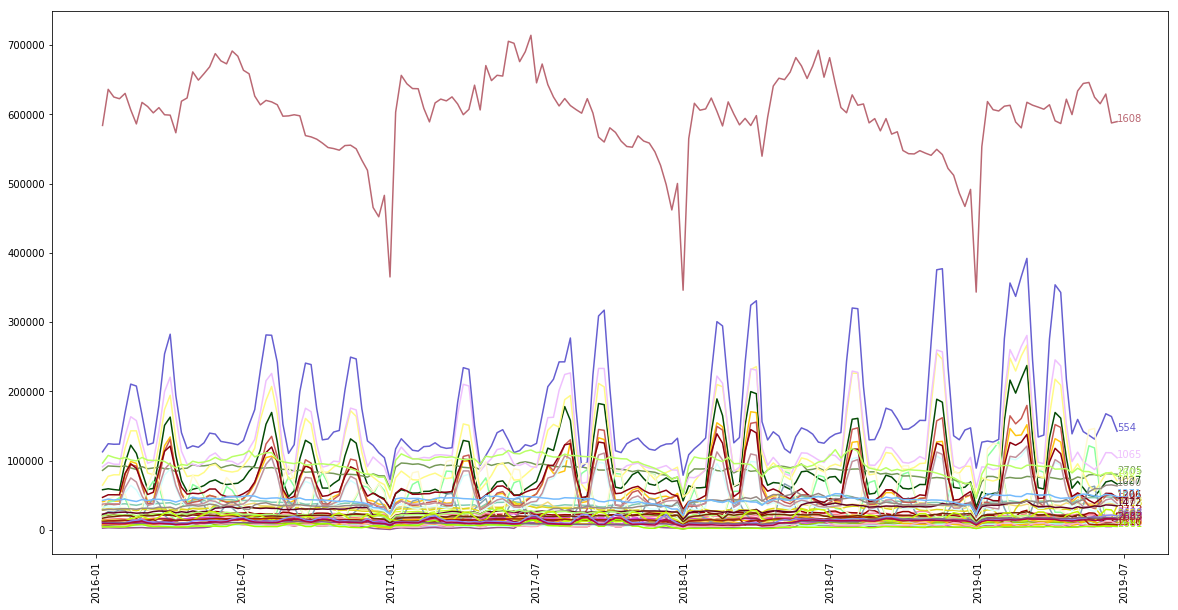

In [259]:
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
for i, s in enumerate(set(train.sku)):
    plt.plot(df[df.sku==s].Date, df[df.sku==s].target,  color=mycolors[i])
    last_x, last_y = df[df.sku==s].Date.values[-1], df[df.sku==s].target.values[-1]
    plt.text(last_x, last_y, str(s), color=mycolors[i])